In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Balaio Orgânico

In [2]:
balaio = pd.read_json(r'C:\Users\Dados\Horta_Castellano\balaioorganico.json')

In [3]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica']

for word in remove:
    balaio['nome']    = balaio.applymap(lambda x: str(x).replace(word,''))
    
#Get only the units from ['nome']
balaio['unidade'] = ''
balaio['unidade'] = balaio.applymap(lambda x: str(x).split(' ')[-1])
remove = ['(',')','g']
for char in remove:
    balaio['unidade'] = balaio['unidade'].apply(lambda x: str(x).replace(char,''))

#Discard the units from ['nome']
separator = ' '
balaio['nome']    = balaio.applymap(lambda x: str(x).split(' ')[:-1])
balaio['nome']    = balaio.applymap(lambda x: separator.join(x))
balaio['nome']    = balaio['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

#Transform the ['preco'] column to numeric'
balaio['preco'] = balaio['preco'].apply(lambda x: str(x).replace(',','.'))
balaio['preco'] = pd.to_numeric(balaio['preco'])


In [4]:
balaio_kg = balaio.loc[balaio['unidade'].str.contains('0')]

balaio_kg['preco']   = 1000 / pd.to_numeric(balaio_kg['unidade']) * pd.to_numeric(balaio_kg['preco'])
balaio_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
balaio_kg_2 = balaio.loc[balaio.unidade == 'k']
balaio_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
balaio_unidade = balaio.loc[balaio.unidade == '']
balaio_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
balaio_limpo = balaio_kg.append(balaio_kg_2).append(balaio_unidade)

In [8]:
balaio_limpo.sort_index().to_csv('balaio.csv',index=False)

# Boutique de Orgânicos

In [9]:
boutique = pd.read_json(r'C:\Users\Dados\Horta_Castellano\boutiquedeorganicos.json')

In [10]:
# Adjusting the ['preco'] column
boutique['preco'] = boutique['preco'].apply(lambda x: str(x).replace('R$',''))
boutique['preco'] = boutique['preco'].apply(lambda x: str(x).replace(',','.'))


boutique['nome']    = boutique['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

In [11]:
boutique_kg = boutique.loc[boutique['unidade'].str.contains('0')]

for char in ['/','gramas']:
    boutique_kg['unidade'] = boutique_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
boutique_kg['preco']   = 1000 / pd.to_numeric(boutique_kg['unidade']) * pd.to_numeric(boutique_kg['preco'])
boutique_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [12]:
boutique_kg_2 = boutique.loc[boutique['unidade'].str.contains('K')]

boutique_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
boutique_unidade = boutique[(~boutique.index.isin(boutique_kg.index)) & (~boutique.index.isin(boutique_kg_2.index))]

boutique_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
boutique_limpo = boutique_unidade.append(boutique_kg).append(boutique_kg_2)
boutique_limpo.sort_index(inplace=True)
boutique_limpo.to_csv('boutique.csv', index=False)

# Casa do Verdureiro

In [15]:
casa = pd.read_json(r'C:\Users\Dados\Horta_Castellano\casadoverdureiro.json')

In [16]:
casa['nome'] = casa['nome'].apply(lambda x: str(x).replace(' – Casa do Verdureiro',''))
casa['nome'] = casa['nome'].apply(lambda x: str(x).replace(' – Yanti',''))

In [17]:
casa['nome'][17] = 'Cabotiá Orgânica Un'
casa['nome'][39] = 'Mamão Formosa Orgânico Un'
casa['nome'][51] = 'Melão Orgânico Un'

In [18]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica']

for word in remove:
    casa['nome']    = casa.applymap(lambda x: str(x).replace(word,''))

# Create the ['unidade'] column
casa['unidade'] = casa['nome'].apply(lambda x: str(x).split(' ')[-1])

#Discard the units from ['nome']
separator = ' '
casa['nome']    = casa.applymap(lambda x: str(x).split(' ')[:-1])
casa['nome']    = casa.applymap(lambda x: separator.join(x))
casa['nome']    = casa['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
casa['preco'] = casa['preco'].apply(lambda x: str(x).replace('R$',''))
casa['preco'] = casa['preco'].apply(lambda x: str(x).replace(',','.'))

In [19]:
casa_kg = casa.loc[casa['unidade'].str.contains('0')]

for char in ['G','g']:
    casa_kg['unidade'] = casa_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
casa_kg['preco']   = 1000 / pd.to_numeric(casa_kg['unidade']) * pd.to_numeric(casa_kg['preco'])
casa_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [20]:
casa_kg_2 = casa.loc[casa['unidade'].str.contains('k')]

casa_kg_2['unidade'] = 'kg'

casa_kg_2['nome'] = casa_kg_2['nome'].apply(lambda x: str(x).replace(' 1',''))

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
casa_unidade = casa[(~casa.index.isin(casa_kg.index)) & (~casa.index.isin(casa_kg_2.index))]

casa_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
casa_limpo = casa_unidade.append(casa_kg).append(casa_kg_2)
casa_limpo.sort_index(inplace=True)
casa_limpo.to_csv('casa.csv', index=False)

# Cesta Delivery

In [23]:
cesta = pd.read_json(r'C:\Users\Dados\Horta_Castellano\cestadelivery.json')

In [24]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica']

for word in remove:
    cesta['nome']    = cesta.applymap(lambda x: str(x).replace(word,''))

# Create the ['unidade'] column
cesta['unidade'] = cesta['nome'].apply(lambda x: str(x).split(' ')[-1])

#Discard the units from ['nome']
separator = ' '
cesta['nome']    = cesta['nome'].apply(lambda x: str(x).split(' ')[:-1])
cesta['nome']    = cesta['nome'].apply(lambda x: separator.join(x))
cesta['nome']    = cesta['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
cesta['preco'] = cesta['preco'].apply(lambda x: str(x).replace('R$',''))
cesta['preco'] = cesta['preco'].apply(lambda x: str(x).replace(',','.'))

In [25]:
cesta['unidade'][26] = '1/2kg'
cesta['unidade'][32] = '250gramas'

cesta['nome'][26] = 'Limão rosa'
cesta['nome'][32] = 'Morango'

In [26]:
cesta_kg = cesta.loc[cesta['unidade'].str.contains('0')]

for char in ['(',')','gramas','gr','o']:
    cesta_kg['unidade'] = cesta_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
cesta_kg['preco']   = 1000 / pd.to_numeric(cesta_kg['unidade']) * pd.to_numeric(cesta_kg['preco'])
cesta_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [27]:
cesta_kg_2 = cesta.loc[(cesta['unidade'].str.contains('K')) | (cesta['unidade'].str.contains('k'))]

cesta_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
cesta_unidade = cesta[(~cesta.index.isin(cesta_kg.index)) & (~cesta.index.isin(cesta_kg_2.index))]

cesta_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
cesta_limpo = cesta_unidade.append(cesta_kg).append(cesta_kg_2)
cesta_limpo.sort_index(inplace= True)
cesta_limpo.to_csv('cesta.csv', index=False)

# Chacara 3 Corregos

In [30]:
corregos = pd.read_json(r'C:\Users\Dados\Horta_Castellano\chacara3corregos.json')

In [31]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica']

for word in remove:
    corregos['nome']    = corregos.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
def find_between(s, start, end):
    return (s.split(start))[1].split(end)[0]

corregos['unidade'] = corregos['nome'].apply(lambda x: find_between(x,'(',')'))

#Discard the units from ['nome']
separator = ' '
corregos['nome']    = corregos['nome'].apply(lambda x: str(x).split(' (')[0])
corregos['nome']    = corregos['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
corregos['preco'] = corregos['preco'].apply(lambda x: str(x).replace('R$',''))
corregos['preco'] = corregos['preco'].apply(lambda x: str(x).replace(',','.'))

In [32]:
corregos_kg = corregos.loc[corregos['unidade'].str.contains('0')]
corregos_kg['unidade'][20] = '500g'

for char in ['(',')','gramas','gr','o','g']:
    corregos_kg['unidade'] = corregos_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
corregos_kg['preco']   = 1000 / pd.to_numeric(corregos_kg['unidade']) * pd.to_numeric(corregos_kg['preco'])
corregos_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [33]:
corregos_kg_2 = corregos.loc[(corregos['unidade'].str.contains('K')) | (corregos['unidade'].str.contains('k'))]

corregos_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
corregos_unidade = corregos[(~corregos.index.isin(corregos_kg.index)) & (~corregos.index.isin(corregos_kg_2.index))]

corregos_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
corregos_limpo = corregos_unidade.append(corregos_kg).append(corregos_kg_2)
corregos_limpo.sort_index(inplace= True)
corregos_limpo.to_csv('corregos.csv', index=False)

# Chácara Strapasson

In [36]:
strapasson = pd.read_json(r'C:\Users\Dados\Horta_Castellano\chacarastrapasson.json')

In [37]:
# Remove products not wanted
drop = strapasson.loc[strapasson.nome.str.contains('Cesta')]
strapasson = strapasson[~strapasson.isin(drop)].dropna().reset_index(drop=True)

In [38]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica','ORGÂNICO','ORGÂNICA','ORGANICO','ORGANICA']

for word in remove:
    strapasson['nome']    = strapasson.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
strapasson['unidade'] = ''
strapasson['unidade'] = strapasson['nome'].apply(lambda x: str(x).split('– ')[-1])

#Discard the units from ['nome']
separator = ' '
strapasson['nome']    = strapasson['nome'].apply(lambda x: str(x).split(' – ')[0])
strapasson['nome']    = strapasson['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
strapasson['preco'] = strapasson['preco'].apply(lambda x: str(x).replace('R$',''))
strapasson['preco'] = strapasson['preco'].apply(lambda x: str(x).replace(',','.'))

In [39]:
strapasson_kg = strapasson.loc[strapasson['unidade'].str.contains('0')]

for char in ['SALADA MIX VERDE COM ACOMPANHAMENTOS- ',' COM ACOMPANHAMENTOS','BANDEJA COM ','BANDEJA ','G','g']:
    strapasson_kg['unidade'] = strapasson_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
strapasson_kg['preco']   = 1000 / pd.to_numeric(strapasson_kg['unidade']) * pd.to_numeric(strapasson_kg['preco'])
strapasson_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
strapasson_kg_2 = strapasson.loc[(strapasson['unidade'].str.contains('K')) | (strapasson['unidade'].str.contains('k'))]

strapasson_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
strapasson_unidade = strapasson[(~strapasson.index.isin(strapasson_kg.index)) & (~strapasson.index.isin(strapasson_kg_2.index))]

strapasson_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
strapasson_limpo = strapasson_unidade.append(strapasson_kg).append(strapasson_kg_2)
strapasson_limpo.sort_index(inplace= True)
strapasson_limpo.to_csv('strapasson.csv', index=False)

# Natureza Pura

In [43]:
natureza = pd.read_json(r'C:\Users\Dados\Horta_Castellano\naturezapura.json')

In [44]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica','ORGÂNICO','ORGÂNICA','ORGANICO','ORGANICA']

for word in remove:
    natureza['nome']    = natureza.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
def find_between(s, start, end):
    try:
        return (s.split(start))[1].split(end)[0]
    except:
        return s

natureza['unidade'] = natureza['nome'].apply(lambda x: find_between(x,'(',')'))

#Discard the units from ['nome']
separator = ' '
natureza['nome']    = natureza['nome'].apply(lambda x: str(x).split(' (')[0])
natureza['nome']    = natureza['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
natureza['preco'] = natureza['preco'].apply(lambda x: str(x).replace('R$',''))
natureza['preco'] = natureza['preco'].apply(lambda x: str(x).replace(',','.'))

In [45]:
natureza_kg = natureza.loc[natureza['unidade'].str.contains('0')]

for char in [' gramas',' g','g','bandeja ']:
    natureza_kg['unidade'] = natureza_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
natureza_kg['preco']   = 1000 / pd.to_numeric(natureza_kg['unidade']) * pd.to_numeric(natureza_kg['preco'])
natureza_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [46]:
natureza_kg_2 = natureza.loc[(natureza['unidade'].str.contains('K')) | (natureza['unidade'].str.contains('k'))]

for char in ['Aprox ',' kg']:
    natureza_kg_2['unidade'] = natureza_kg_2['unidade'].apply(lambda x: str(x).replace(char,''))
    
natureza_kg_2['unidade'] = natureza_kg_2['unidade'].apply(lambda x: str(x).replace(',','.'))

natureza_kg_2['preco']   = 1 / pd.to_numeric(natureza_kg_2['unidade']) * pd.to_numeric(natureza_kg_2['preco'])
    
natureza_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [47]:
natureza_unidade = natureza[(~natureza.index.isin(natureza_kg.index)) & (~natureza.index.isin(natureza_kg_2.index))]

natureza_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
natureza_limpo = natureza_unidade.append(natureza_kg).append(natureza_kg_2)
natureza_limpo.sort_index(inplace= True)
natureza_limpo.to_csv('natureza.csv', index=False)

# Oh Market

In [49]:
market = pd.read_json(r'C:\Users\Dados\Horta_Castellano\ohmarket.json')

In [50]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica','ORGÂNICO','ORGÂNICA','ORGANICO','ORGANICA']

for word in remove:
    market['nome']    = market.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
def find_between(s, start, end):
    try:
        return (s.split(start))[1].split(end)[0]
    except:
        return s

market['unidade'] = market['nome'].apply(lambda x: find_between(x,'(',')'))

#Discard the units from ['nome']
separator = ' '
market['nome']    = market['nome'].apply(lambda x: str(x).split(' (')[0])
market['nome']    = market['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
market['preco'] = market['preco'].apply(lambda x: str(x).replace('R$',''))
market['preco'] = market['preco'].apply(lambda x: str(x).replace(',','.'))

In [51]:
market_kg = market.loc[market['unidade'].str.contains('0')]

for char in ['Porção de ','Cogumelo Shitake ',' – Cogills','g']:
    market_kg['unidade'] = market_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
drop = market_kg.loc[market_kg['unidade'].str.contains('entre')]
market_kg = market_kg[~market_kg.isin(drop)].dropna()  

market_kg['preco']   = 1000 / pd.to_numeric(market_kg['unidade']) * pd.to_numeric(market_kg['preco'])
market_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
market_kg_2 = market.loc[(market['unidade'].str.contains('K')) | (market['unidade'].str.contains('k'))]

market_kg_2.drop(48,axis=0,inplace=True)
market_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
market_unidade = market[(~market.index.isin(market_kg.index)) & (~market.index.isin(market_kg_2.index))]

market_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
market_limpo = market_unidade.append(market_kg).append(market_kg_2)
market_limpo.sort_index(inplace= True)
market_limpo.to_csv('market.csv', index=False)

# Organicos Inbox

In [55]:
inbox = pd.read_json(r'C:\Users\Dados\Horta_Castellano\organicosinbox.json')

In [56]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica','ORGÂNICO','ORGÂNICA','ORGANICO','ORGANICA']

for word in remove:
    inbox['nome']    = inbox.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
def find_between(s, start, end):
    try:
        return (s.split(start))[1].split(end)[0]
    except:
        return s

inbox['unidade'] = inbox['nome'].apply(lambda x: find_between(x,'(',')'))

#Discard the units from ['nome']
separator = ' '
inbox['nome']    = inbox['nome'].apply(lambda x: str(x).split(' (')[0])
inbox['nome']    = inbox['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
inbox['preco'] = inbox['preco'].apply(lambda x: str(x).replace('R$',''))
inbox['preco'] = inbox['preco'].apply(lambda x: str(x).replace(',','.'))

In [57]:
drop = inbox.loc[inbox.unidade.isin(["Molino D'Oro",'Ecobio','750ml','Sítio do Moinho','Volkmann','200ml'])]
inbox = inbox[~inbox.isin(drop)].dropna().reset_index(drop=True)

In [58]:
inbox_kg = inbox.loc[inbox['unidade'].str.contains('0')]

for char in ['Feijão Preto ','Feijão Carioca ','Feijão Vermelho ','g']:
    inbox_kg['unidade'] = inbox_kg['unidade'].apply(lambda x: str(x).replace(char,''))
    
inbox_kg['preco']   = 1000 / pd.to_numeric(inbox_kg['unidade']) * pd.to_numeric(inbox_kg['preco'])
inbox_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [59]:
inbox_kg_2 = inbox.loc[(inbox['unidade'].str.contains('K')) | (inbox['unidade'].str.contains('k'))]

inbox_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
inbox_unidade = inbox[(~inbox.index.isin(inbox_kg.index)) & (~inbox.index.isin(inbox_kg_2.index))]

inbox_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
inbox_limpo = inbox_unidade.append(inbox_kg).append(inbox_kg_2)
inbox_limpo.sort_index(inplace= True)
inbox_limpo.to_csv('inbox.csv', index=False)

# Sitio Mais Saude

In [62]:
sitio = pd.read_json(r'C:\Users\Dados\Horta_Castellano\sitiomaissaude.json')

In [63]:
sitio = sitio.dropna(how='any').reset_index(drop=True)

In [64]:
#Remove the unwanted words
remove = ['Orgânico','Orgânica','Organico','Organica','orgânico','orgânica','organico','organica','ORGÂNICO','ORGÂNICA','ORGANICO','ORGANICA']

for word in remove:
    sitio['nome']    = sitio.applymap(lambda x: str(x).replace(word,''))

#Get the ['unidade'] column
def find_between(s, start, end):
    try:
        return (s.split(start))[1].split(end)[0]
    except:
        return s

sitio['unidade'] = sitio['nome'].apply(lambda x: find_between(x,'(',')'))

#Discard the units from ['nome']
separator = ' '
sitio['nome']    = sitio['nome'].apply(lambda x: str(x).split(' (')[0])
sitio['nome']    = sitio['nome'].apply(lambda x: str(x)[:-1] if str(x)[-1] == ' ' else x)

# Adjusting the ['preco'] column
sitio['preco'] = sitio['preco'].apply(lambda x: str(x).replace('R$',''))
sitio['preco'] = sitio['preco'].apply(lambda x: str(x).replace(',','.'))
sitio['preco'] = sitio['preco'].apply(lambda x: str(x).split(' ')[1])

In [65]:
sitio_kg = sitio.loc[sitio['unidade'].str.contains('0')]

for char in ['.','+/- ','+/-','+-','gr']:
    sitio_kg['unidade'] = sitio_kg['unidade'].apply(lambda x: str(x).replace(char,''))

sitio_kg['preco']   = 1000 / pd.to_numeric(sitio_kg['unidade']) * pd.to_numeric(sitio_kg['preco'])
sitio_kg['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [66]:
sitio_kg_2 = sitio.loc[(sitio['unidade'].str.contains('K')) | (sitio['unidade'].str.contains('k'))]

sitio_kg_2['unidade'] = 'kg'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
sitio_unidade = sitio[(~sitio.index.isin(sitio_kg.index)) & (~sitio.index.isin(sitio_kg_2.index))]

sitio_unidade['unidade'] = 'unidade'

C:\Users\Dados\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
sitio_limpo = sitio_unidade.append(sitio_kg).append(sitio_kg_2)
sitio_limpo.sort_index(inplace= True)
sitio_limpo.to_csv('sitio.csv', index=False)

# -------------------------------------------------------------------------------------

# Agrupando tudo em uma unica tabela

# ----------------------------------------------------------------------------------

In [69]:
geral_unidade = pd.DataFrame(columns=sitio_limpo.columns)
geral_kg      = pd.DataFrame(columns=sitio_limpo.columns)


df_lists = [balaio_limpo,boutique_limpo,casa_limpo,cesta_limpo,corregos_limpo,inbox_limpo,market_limpo,natureza_limpo,sitio_limpo,strapasson_limpo]

for df in df_lists:
    geral_unidade = pd.concat([geral_unidade,df.loc[df.unidade == 'unidade']])
    geral_kg      = pd.concat([geral_kg,df.loc[df.unidade == 'kg']])

In [70]:
geral_kg      = geral_kg.reset_index(drop = True).drop('unidade',axis=1)
geral_unidade = geral_unidade.reset_index(drop = True).drop('unidade',axis=1)

geral_kg['nome']      = geral_kg['nome'].str.lower()
geral_unidade['nome'] = geral_unidade['nome'].str.lower()

geral_kg['preco']      = pd.to_numeric(geral_kg['preco'])
geral_unidade['preco'] = pd.to_numeric(geral_unidade['preco'])

In [71]:
geral_unidade

,nome,preco
0,abacaxi,11.50
1,couve-flor,4.95
2,escarola,2.70
3,escarola roxa,2.80
4,espinafre,3.50
...,...,...
272,abacaxi pérola,5.99
273,abacaxi havai,5.99
274,alface roxa hidropônica,3.99
275,ovos brancos,6.49


In [72]:
geral_kg

,nome,preco
0,abacate,11.000000
1,banana caturra,4.166667
2,banana maçã,7.900000
3,banana ouro,6.000000
4,banana prata,4.900000
...,...,...
435,salada mix verde,23.960000
436,uva crimson,17.940000
437,uva thompson,17.940000
438,yakissoba,24.600000


In [73]:
geral_unidade.to_csv('geral_unidade.csv', index=False)
geral_kg.to_csv('geral_kg.csv', index=False)

# Pesquisa

Foram encontrados 42 resultados para alface na tabela de preços por unidade
Os resultados são:
alface crespa                8
alface americana             8
alface lisa                  6
alface roxa                  4
alface crespa verde          3
alface romana                3
alface mimosa verde          2
alface mimosa roxa           2
alface crespa hidropônica    1
alface roxa hidropônica      1
alface lisa hidropônica      1
alface crespa roxa           1
alface mimosa                1
alface lisa verde            1
Name: nome, dtype: int64


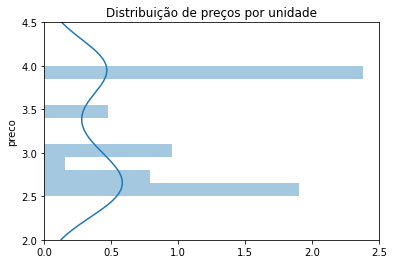

A média de preço é de 3.21 e a mediana é de 3.0
Moda dos preços: 2.5


preco       
                               mean median
nome                                      
alface americana           3.343750  3.250
alface crespa              3.148750  2.995
alface crespa hidropônica  3.990000  3.990
alface crespa roxa         2.500000  2.500
alface crespa verde        3.000000  2.500
alface lisa                3.033333  2.600
alface lisa hidropônica    3.990000  3.990
alface lisa verde          2.500000  2.500
alface mimosa              2.700000  2.700
alface mimosa roxa         3.250000  3.250
alface mimosa verde        2.750000  2.750
alface romana              3.566667  4.000
alface roxa                3.300000  3.350
alface roxa hidropônica    3.990000  3.990



Foram encontrados 2 resultados para alface na tabela de preços por kilograma
Os resultados são:
coração alface americana    2
Name: nome, dtype: int64


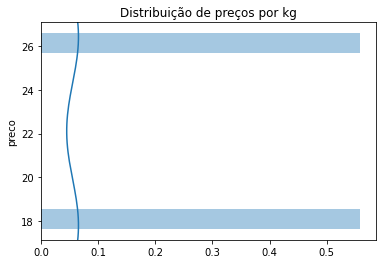

A média de preço é de 22.12 e a mediana é de 22.12
Moda dos preços: 17.63


preco           
                               mean     median
nome                                          
coração alface americana  22.116667  22.116667

In [126]:
pesquisar_por = 'alface'

unidade = geral_unidade[geral_unidade.nome.str.contains(pesquisar_por)]

kg = geral_kg[geral_kg.nome.str.contains(pesquisar_por)]

print(f'Foram encontrados {len(unidade)} resultados para {pesquisar_por} na tabela de preços por unidade')
print('Os resultados são:')
pprint(unidade.nome.value_counts())
sns.distplot(unidade.preco, vertical = True, bins=10)
plt.title('Distribuição de preços por unidade')
plt.ylim(unidade.preco.min()-0.5,unidade.preco.max()+0.5)
plt.show()
print(f'A média de preço é de {round(unidade.preco.mean(),2)} e a mediana é de {round(unidade.preco.median(),2)}')
print("Moda dos preços:",round(unidade.preco.mode()[0],2))
display(unidade.groupby('nome').agg([np.mean,np.median]))

print('\n')
print('===================================================================================================')
print(f'Foram encontrados {len(kg)} resultados para {pesquisar_por} na tabela de preços por kilograma')
print('Os resultados são:')
pprint(kg.nome.value_counts())
sns.distplot(kg.preco, vertical = True, bins=10)
plt.title('Distribuição de preços por kg')
plt.ylim(kg.preco.min()-0.5,kg.preco.max()+0.5)
plt.show()
print(f'A média de preço é de {round(kg.preco.mean(),2)} e a mediana é de {round(kg.preco.median(),2)}')
print("Moda dos preços:",round(kg.preco.mode()[0],2))
display(kg.groupby('nome').agg([np.mean,np.median]))